In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = './material_TPs/TP7/vtest.avi'
cap = cv.VideoCapture(filename)

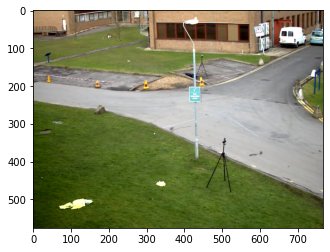

-1

In [6]:
n = 13
# tiempo en segundos
time = 20

total_frames = cap.get(cv.CAP_PROP_FRAME_COUNT) 
fps = int(cap.get(cv.CAP_PROP_FPS)) 
seconds = int(total_frames / fps)
actualization = np.arange(0,seconds,time) 

for i in actualization:
    
        frames = cap.get(cv.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=n)
        samples = []
        
        for i in frames:
            
            cap.set(cv.CAP_PROP_POS_FRAMES, i)
            ret, frame = cap.read()
            samples.append(frame)
        
        med_frame = np.median(samples, axis=0).astype(dtype=np.uint8)
        gray_med = cv.cvtColor(med_frame, cv.COLOR_BGR2GRAY)
        
mediana = med_frame[:,:,::-1]
plt.imshow(mediana)
plt.show()        
#cv.imshow('frame', med_frame)
cv.waitKey(0)


In [ ]:
cap.set(cv.CAP_PROP_POS_FRAMES, 0)
ret = True

while (cap.isOpened()):
    ret, frame = cap.read()
    cap.set(cv.CAP_PROP_FPS, 30)
    
    if ret:
        frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        diff = cv.absdiff(frame_gray, gray_med)
        th, mask = cv.threshold(diff, 30, 255, cv.THRESH_BINARY)
            
    cv.imshow('diferencia', mask)
    cv.imshow('frame', frame)
    if (cv.waitKey(2) == ord('s')):
        break
    
cap.release()
cv.destroyAllWindows()

### Comparación con Mezcla de Gaussianas

Dejo acá el link del video de comparación de mezcla de gaussianas con el resultado del algoritmo.

https://www.youtube.com/watch?v=V3AXl14UFsc

La conclusión es que tiene mucho menos ruido que el GMM porque al hacer la diferencia con la mediana, hace un efecto parecido al filtro de mediana que elimina ruido salt and pepper, que es el ruido que se nota en la hecha con GMM. 